In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
x_train=pd.read_csv(r"C:\Users\Hosiyar Singh\Documents\python machine learning\Logistic_X_Train.csv")
y_train=pd.read_csv(r"C:\Users\Hosiyar Singh\Documents\python machine learning\Logistic_Y_Train.csv")

In [3]:
f1=x_train[['f1']].values
f2=x_train[['f2']].values
f3=x_train[['f3']].values
x=f1
x=np.hstack((f1,f2))
x=np.hstack((x,f3))
f1=f1.reshape((-1,))
f2=f2.reshape((-1,))
f3=f3.reshape((-1,))
y=y_train[['label']].values
y=y.reshape((-1,))

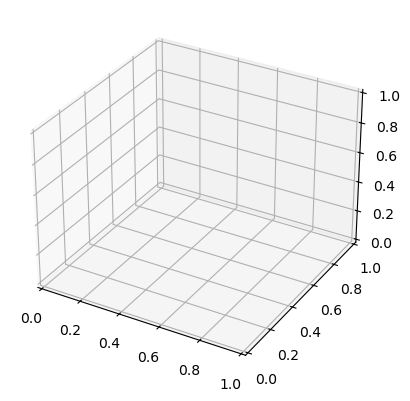

In [4]:
fig=plt.figure()
ax=plt.axes(projection='3d')
plt.show()

C:\Users\Hosiyar Singh\AppData\Local\Temp\ipykernel_44276\469993119.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(f1,f2,f3, cmap='hsv')


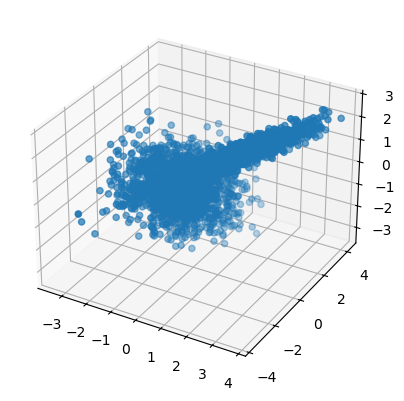

In [5]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(f1,f2,f3, cmap='hsv')
plt.show()

In [6]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [7]:
def sigmoid(hx):
    return 1.0/(1.0+np.exp(-1.0*hx))

In [8]:
def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=(y[i]*np.log2(hx))+((1-y[i])*np.log2(1-hx))
    return err/(x.shape[0])   

In [9]:
def gradient(x,y,w,b):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=((y[i]-hx)*x[i])
    grad_b/=m
    grad_w/=m
    return [grad_w,grad_b]

In [10]:
def gradient_ascent(x,y,w,b,learning_rate=0.01):
    err=error(x,y,w,b)
    [grad_w,grad_b]=gradient(x,y,w,b)
    w+=learning_rate*grad_w
    b+=learning_rate*grad_b
    return err,w,b

In [11]:
loss=[]
acc=[]
w=np.zeros((x.shape[1],))
b=0
print(w)

[0. 0. 0.]


In [12]:
for i in range(10000):
    l,w,b=gradient_ascent(x,y,w,b,learning_rate=0.1)
    loss.append(l)

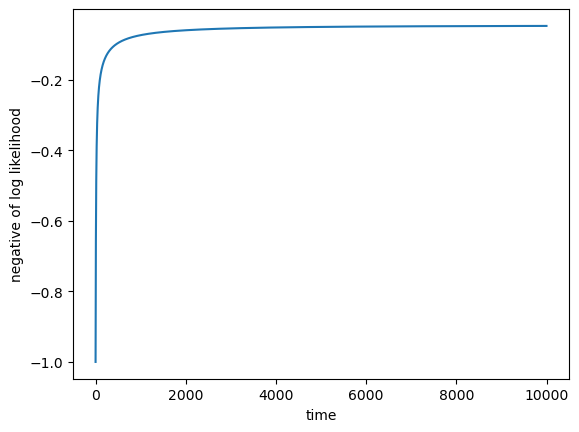

In [13]:
plt.plot(loss)
plt.ylabel('negative of log likelihood')
plt.xlabel('time')
plt.show()

In [14]:
x_test=pd.read_csv(r"C:\Users\Hosiyar Singh\Documents\python machine learning\Logistic_X_Test.csv")

In [16]:
f1_test=x_test[['f1']].values
f2_test=x_test[['f2']].values
f3_test=x_test[['f3']].values
f1_test=f1_test.reshape((-1,))
f2_test=f2_test.reshape((-1,))
f3_test=f3_test.reshape((-1,))

In [17]:
print(f1)

[-1.23937466 -1.03607028 -0.61557914 ...  0.08827657  1.52515501
 -0.97981744]


C:\Users\Hosiyar Singh\AppData\Local\Temp\ipykernel_44276\3498602331.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(f2,f1,f3, cmap='hsv')


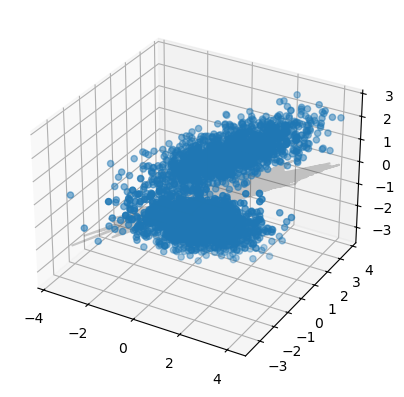

In [29]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(f2,f1,f3, cmap='hsv')
#plt.show()
xt=f2
yt=f1
zt=-((w[1]*xt+w[2]*yt+b)/w[0])
ax.plot3D(xt,yt,zt,color='k',alpha=0.2)
plt.show()

C:\Users\Hosiyar Singh\AppData\Local\Temp\ipykernel_44276\3562611689.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(f2_test,f1_test,f3_test, cmap='hsv')


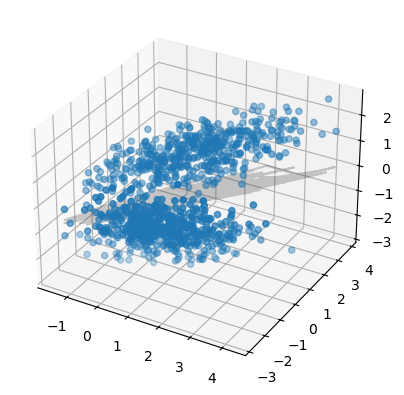

In [30]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(f2_test,f1_test,f3_test, cmap='hsv')
#plt.show()
xt=f2_test
yt=f1_test
zt=-((w[1]*xt+w[2]*yt+b)/w[0])
ax.plot3D(xt,yt,zt,color='k',alpha=0.2)
plt.show()